In [1]:
from script.model_localization import pyramid, sliding_window, iou_bbox, non_maximum_supperssion, visualize_bbox
from script.model_classification import SVMObjectClassifier
from sklearn.model_selection import train_test_split
from script.dataset import load_vehicle_dataset
from script.feature_source import FeatureExtracter
from script.training import training_model
from script.slider import Slider
import numpy as np
import argparse
import time
import cv2
import os

In [2]:
sourcer_params = {
  'color_model': 'gray',                # hls, hsv, yuv, ycrcb 
  'spatial_size': (200, 200),            # (16, 16), (32, 32), (64, 64)
  'orientations': 9,        # 6 - 12
  'pixels_per_cell': 8,               # 8, 16
  'cells_per_block': 2,                # 1, 2
  'transform_sqrt': True,
  'block_norm': 'L2',
  'hog_visualize': True
}
exist_path = './save_model/model.pkl'
save_path = './save_model'
feature_extracter = FeatureExtracter(**sourcer_params)

In [3]:
model = SVMObjectClassifier(C=0.5)
model.set_feature_extracter(feature_extracter)
if os.path.exists(save_path + '/model.pkl'):
    print('Loading model...')
    model.load(save_path)

Loading model...


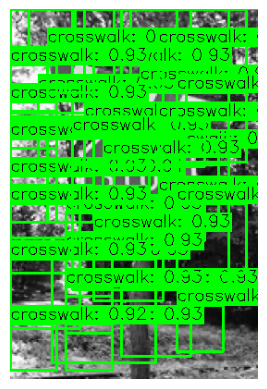

In [12]:
windowSize = [(50, 50)]
image_path = './dataset/traffic_sign_board/images/road65.png'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
predict_bbox = []
for window_size in windowSize:
    slider = Slider(model, window_size, 20, scale=1.5, visualize=True)
    predict_bbox += slider.predict(image, 0.92)
predict_bbox = non_maximum_supperssion(predict_bbox, 0.2)
visualize_bbox(image, predict_bbox)

In [15]:
np.array(predict_bbox)[:, 4]

array(['crosswalk', 'crosswalk', 'crosswalk', 'crosswalk', 'crosswalk',
       'crosswalk', 'crosswalk', 'crosswalk', 'crosswalk', 'crosswalk',
       'crosswalk', 'crosswalk', 'crosswalk', 'crosswalk', 'crosswalk',
       'crosswalk', 'crosswalk', 'crosswalk', 'crosswalk', 'crosswalk',
       'crosswalk', 'crosswalk', 'crosswalk', 'crosswalk', 'crosswalk',
       'crosswalk', 'crosswalk', 'crosswalk', 'crosswalk', 'crosswalk',
       'crosswalk', 'crosswalk', 'crosswalk', 'crosswalk', 'crosswalk',
       'crosswalk', 'crosswalk', 'crosswalk'], dtype='<U32')